In [24]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import wrangle as pp
import model as md

# import splitting
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

import warnings
warnings.filterwarnings("ignore")

# Bring Work from Wrangle to Work

In [3]:
prop_df = pd.read_csv('nyc-rolling-sales.csv')
prop_df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
prop_df = pp.prepare_prop(prop_df)
prop_df

,borough,neighborhood,tax_class_at_present,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,building_class_at_time_of_sale,sale_price,sale_date,age
4172,1,GREENWICH VILLAGE-WEST,1,10014,1,0,1,384.0,1152.0,1,A5,1375000.0,2016-10-07 00:00:00,121
4173,1,GREENWICH VILLAGE-WEST,1,10014,1,0,1,384.0,1152.0,1,A5,1375000.0,2016-10-07 00:00:00,121
4811,1,HARLEM-CENTRAL,1,10030,1,0,1,2000.0,3360.0,1,A4,1000000.0,2016-09-29 00:00:00,123
4824,1,HARLEM-CENTRAL,1,10027,2,0,2,1799.0,3600.0,1,B1,1310000.0,2016-11-16 00:00:00,123
4827,1,HARLEM-CENTRAL,1,10030,2,0,2,1749.0,2625.0,1,B3,850000.0,2017-03-27 00:00:00,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84537,5,WOODROW,1,10309,2,0,2,4350.0,2840.0,1,B2,625000.0,2016-10-18 00:00:00,26
84540,5,WOODROW,1,10309,2,0,2,3325.0,1300.0,1,B2,509000.0,2016-10-31 00:00:00,27
84543,5,WOODROW,1,10309,2,0,2,2400.0,2575.0,1,B9,450000.0,2016-11-28 00:00:00,24
84544,5,WOODROW,1,10309,2,0,2,2498.0,2377.0,1,B9,550000.0,2017-04-21 00:00:00,24


In [5]:
# Spliting into train validate and test
train_validate, test = train_test_split(prop_df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)


In [6]:
print(train.shape)
print(validate.shape)
print(test.shape)

(12645, 14)
(5420, 14)
(4517, 14)


In [7]:
# Getting count of null
prop_df.isnull().sum()

borough                           0
neighborhood                      0
tax_class_at_present              0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
age                               0
dtype: int64

# Further Splitting

In [8]:
# Splitting into x / y  and features and target
# Splitting into x / y  and features and target # Needs to be adjusted
X_train = train.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_train = train.sale_price

X_validate = validate.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_validate = validate.sale_price

X_test = test.drop(columns = ['borough', 'neighborhood', 'tax_class_at_present', 'building_class_at_time_of_sale', 'sale_date', 'sale_price', 'residential_units', 'commercial_units', 'zip_code'])
y_test = test.sale_price

In [9]:
X_train.head()

,total_units,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,age
38029,1,2000.0,1274.0,1,82
43922,2,2100.0,1782.0,1,67
63196,2,4142.0,2296.0,1,67
41776,1,1600.0,1771.0,1,82
25962,3,2020.0,2520.0,1,111


# Exploration:

# Intial Questions
1. Is there correlation between sale price of Properties and Total Units?
2. Is there correlation between sale price of Properties and Land Square Feet?
3. Is there correlation between sale price of Properties and Gross Square Feet?
4. Is there correlation between sale price of Properties and Age?

In [14]:
def get_histogram(prop_df):
    
    plt.figure(figsize=(16, 16))

    # List of columns
    cols = ['total_units', 'land_square_feet', 'gross_square_feet', 'sale_price']

    for i, col in enumerate(cols):
    
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 
    
        # Create subplot.
        plt.subplot(5, 1, plot_number)
    
        # Title with column name.
        plt.title(col)
    
        # Display histogram for column.
        prop_df[col].hist(bins= 100, edgecolor='black')
    

    
        # Hide gridlines.
        plt.grid(False)
        
        
        plt.figure(figsize=(16,7))

      
                
        
def get_boxplot(prop_df):
    plt.figure(figsize=(16, 10))
    # List of columns
    cols = ['total_units', 'land_square_feet', 'gross_square_feet', 'sale_price']
    for i, col in enumerate(cols):

        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Display boxplot for column.
        sns.boxplot(data=prop_df[cols])
    

        # Hide gridlines.
        plt.grid(False)

    plt.show()

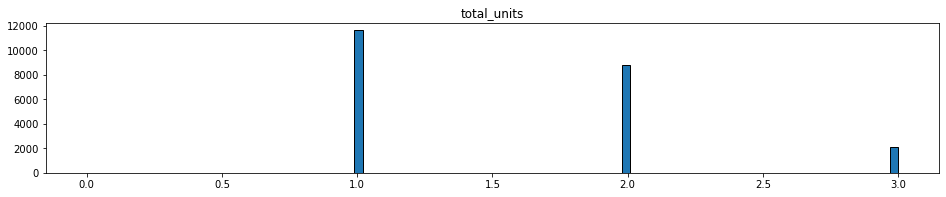

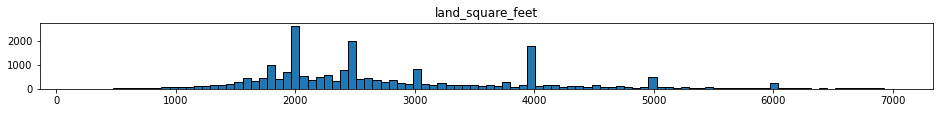

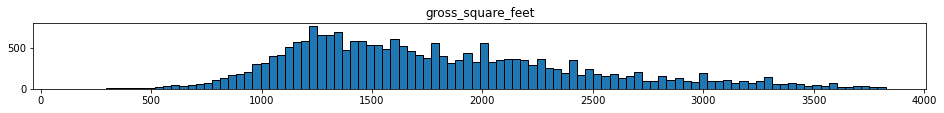

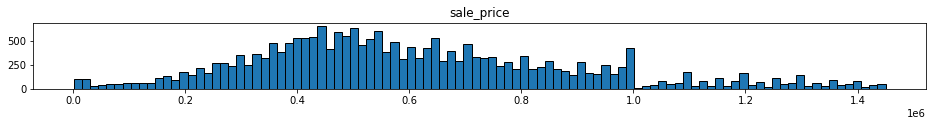

<Figure size 1152x504 with 0 Axes>

In [11]:
get_histogram(prop_df)

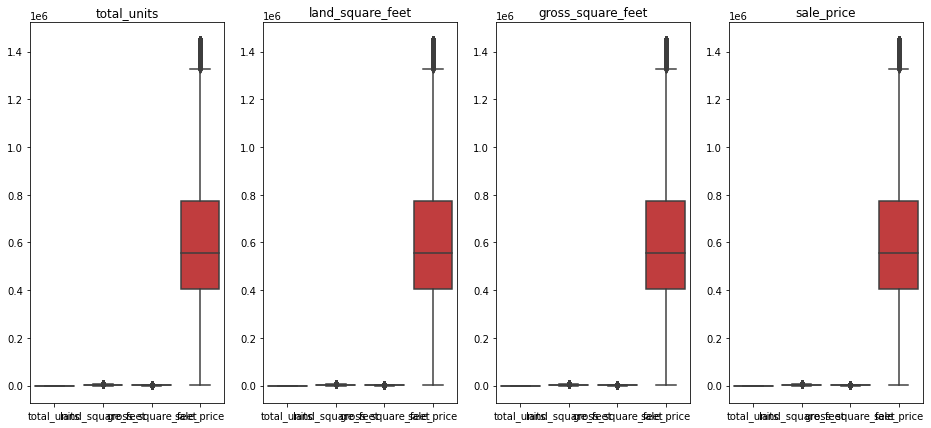

In [12]:
get_boxplot(prop_df)

###### Looks like we cleaned data well, so we got distribution that looks normal.

For those questions asked, I think we can get the answer to those questions by visualizing lmplot and getting heatmap of correlation coefficients.


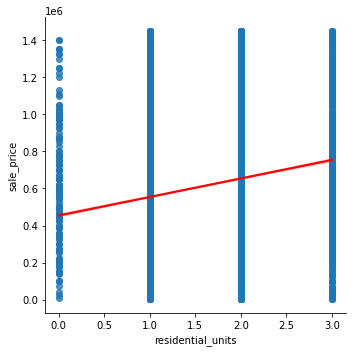

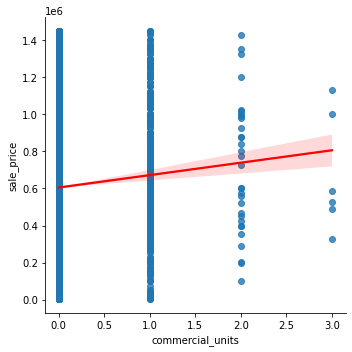

In [32]:
# plotting lmplot for the train data set

col_list = ['residential_units', 'commercial_units']
for item in col_list:
    
    sns.lmplot(x = item, y = 'sale_price', data = train, line_kws = {'color' : 'red'})
    pd.set_option('display.max_rows', 500)
    pd.options.display.max_rows
    plt.show()
   


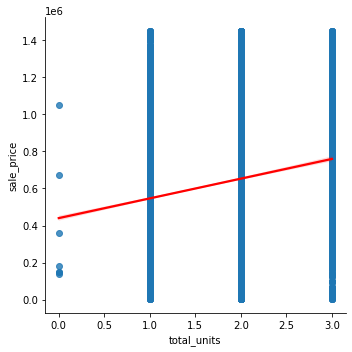

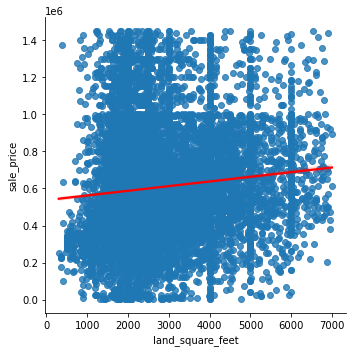

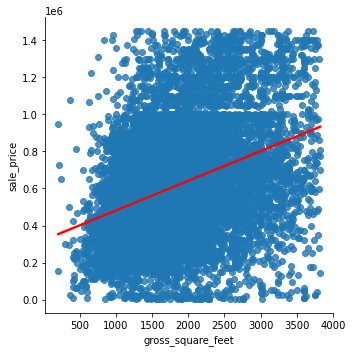

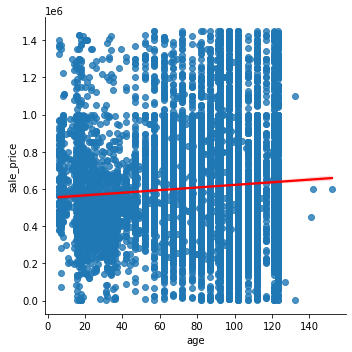

In [31]:
col_list = ['total_units', 'land_square_feet', 'gross_square_feet', 'age']
for item in col_list:
    
    sns.lmplot(x = item, y = 'sale_price', data = train, line_kws = {'color' : 'red'})
    pd.set_option('display.max_rows', 500)
    pd.options.display.max_rows
    plt.show()
   

###### Based on this visualization, we can tell that total units, land square feet, gross square feet, and age all are corelated to sale price of the properties.

###### It looks like the graph is little unclear on correlation between age and sale price of the properties , so we will run the statistical tests for it.
###### For now we will create a correlation heat map.

In [20]:
# Creating the correlation matrix  for all atributes of properties in train dataset
prop_df_corr = train.corr()
prop_df_corr

,borough,zip_code,residential_units,commercial_units,total_units,land_square_feet,gross_square_feet,tax_class_at_time_of_sale,sale_price,age
borough,1.000000,-0.120687,-0.283889,-0.049438,-0.299721,0.268788,-0.253288,-0.024141,-0.078148,-0.330793
zip_code,-0.120687,1.000000,0.063822,0.027091,0.072843,-0.078803,-0.005557,-0.000306,0.243589,0.330824
residential_units,-0.283889,0.063822,1.000000,-0.151729,0.949116,-0.115840,0.576932,-0.239302,0.227498,0.086340
commercial_units,-0.049438,0.027091,-0.151729,1.000000,0.164140,-0.074324,0.153480,0.646218,0.049103,0.052603
total_units,-0.299721,0.072843,0.949116,0.164140,1.000000,-0.139742,0.624343,-0.035279,0.243029,0.102908
land_square_feet,0.268788,-0.078803,-0.115840,-0.074324,-0.139742,1.000000,0.050898,-0.004465,0.102306,-0.057586
gross_square_feet,-0.253288,-0.005557,0.576932,0.153480,0.624343,0.050898,1.000000,0.059549,0.365327,-0.052198
tax_class_at_time_of_sale,-0.024141,-0.000306,-0.239302,0.646218,-0.035279,-0.004465,0.059549,1.000000,0.016927,0.004416
sale_price,-0.078148,0.243589,0.227498,0.049103,0.243029,0.102306,0.365327,0.016927,1.000000,0.073673
age,-0.330793,0.330824,0.086340,0.052603,0.102908,-0.057586,-0.052198,0.004416,0.073673,1.000000


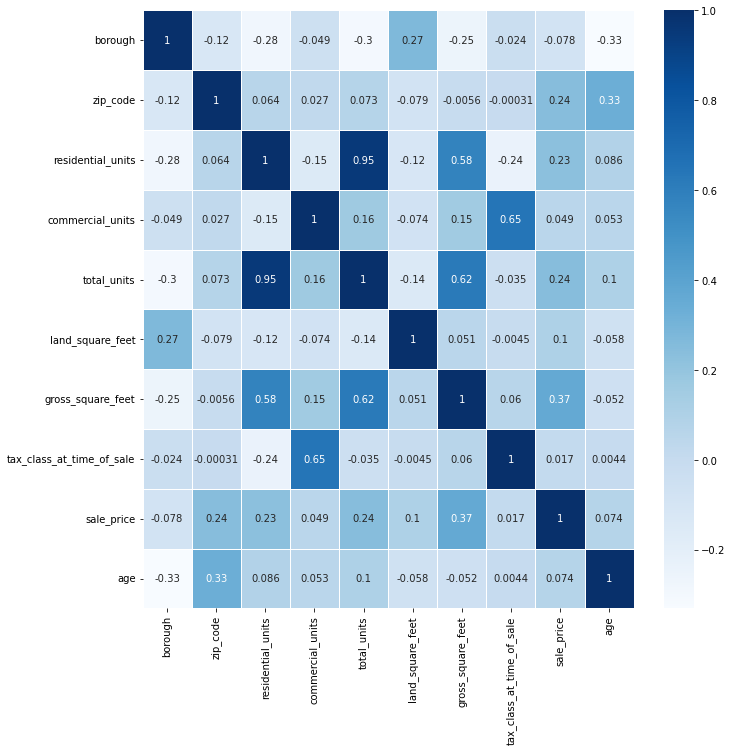

In [21]:
plt.figure(figsize = (11, 11))
sns.heatmap(prop_df_corr, cmap = 'Blues', annot = True, linewidth = 0.75)
plt.show()

In [22]:
# sorting correlation coefficients in ascending order.
train.corr()['sale_price'].sort_values()

borough                     -0.078148
tax_class_at_time_of_sale    0.016927
commercial_units             0.049103
age                          0.073673
land_square_feet             0.102306
residential_units            0.227498
total_units                  0.243029
zip_code                     0.243589
gross_square_feet            0.365327
sale_price                   1.000000
Name: sale_price, dtype: float64

### Statitical Tests to check the correlation between age and sale price.

### Hypothesis
- HO: Age and Sale Price has not linear relation.
- H1: Age and Sale Price has linear relation.

In [25]:
from scipy import stats

alpha = 0.05 
corr, p_value = stats.pearsonr(train.age, train.sale_price)
corr, p_value

if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject null hypothesis')
print(p_value ,  corr)

We reject the null hypothesis.
1.0864740252233008e-16 0.0736725504909234


In [26]:


alpha = 0.05 
corr, p_value = stats.spearmanr(train.age, train.sale_price)
corr, p_value

if p_value < alpha:
    print('We reject the null hypothesis.')
else:
    print('We fail to reject null hypothesis')
print(p_value ,  corr)

We reject the null hypothesis.
2.2392840066243972e-06 0.042053453528066734


### Thus, running both pearsonr and spearmanr statistical test, we reject null hypothesis that states 'Age and Sale Price has not linear relation.' It means that age and sale price may have corelation.

# Exploration Takeaways / Summary

- Total Units, Gross Square Feet, Land Square Feet has positive correlation with sale price. 
- Even age has positive correlation with sale price.
- Even graph matches with correlation.
- Even statistical tests supports correlationship of sale price of properties and age.